# El método de Newton

In [10]:
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [2]:
using Interact

El método de Newton (también llamado algoritmo de Newton-Raphson) constituye otro método numérico iterativo para encontrar raíces de funciones. 

Requiere más información sobre la función, pero a cambio puede funcionar mejor. Derivaremos e implementaremos el método en este notebook.

[1] (Esta pregunta es para llevarse a cabo con papel y pluma.)

Considera una función $f: \mathbb{R} \to \mathbb{R}$.
Supón que $x_0$ es una adivinanza inicial de una raíz, y que $x^*$ es la raíz exacta pero 
desconocida. Sigue los siguientes pasos para derivar el método de Newton.

(i) Supón que $x_0$ es suficientemente cercana a $x^*$. Define $\delta$ como la distancia  (con signo) de $x_0$ desde $x^*$. 

(ii) Escribe la ecuación que corresponde a que $x^*$ sea una raíz de la función, y exprésala en términos de $\delta$. 

(iii) Desarrolla esta ecuación en una serie de Taylor a primer orden, para encontrar un valor aproximado de $\delta$.

(iv) Así encuentra una ecuación para la siguiente aproximación $x_1$ a la raíz, $x_1 = x_0 + \delta$. 

[2] Demuestra que el método Babilónico es un caso especial del método de Newton. [Pista: ¿Para cuál función $f$?]

El método Babilónico, calcula las raíces de un cierto número $S$, $\sqrt{S}$. 

La función es: $f(x) = x^2 - S$ 

La derivada de $f(x)$ es: $fp(x) = 2 x$

Si ahora aplicamos el método de Newton a $f$:

$$x_{n+1} = x_n - \frac{f(x_n)}{fp(x_n)}$$
Sustituyendo,
$$x_{n+1} = x_n - \frac{x_n^2 - S}{2 x_n}$$
$$x_{n+1} = x_n - \frac{x_n^2}{2 x_n} + \frac{S}{2 x_n}$$
$$x_{n+1} = x_n - \frac{x_n}{2} + \frac{S}{2 x_n}$$
$$x_{n+1} = \frac{x_n}{2} + \frac{S}{2 x_n}$$
$$x_{n+1} = \frac{1}{2} (x_n + \frac{S}{x_n})$$

Tomando $y_n = \frac{S}{x_n}$

Tenemos 
$$x_{n+1} = \frac{1}{2} (x_n + y_n)$$


Dado que al iterar este resultado obtenemos $\sqrt{S}$, se puede concluir que la función $f(x) = x^2 - S$ es un caso especial del método de Newton.

[3] Escribe una función que implementa el método de Newton. Puedes suponer que el usuario provenga tanto la función `f` como su derivada `fp` como argumentos a la función `newton` (así como la condición inicial `x0`). [Posteriormente veremos cómo evitar tener que proveer también la derivada.]

In [1]:
""" La función Newt(f::Function, fp, x0::Number, n) calcula, a partir de una condición inicial x0,
la aproximación de una raíz de la función f, iterando n veces."""

function Newt(f::Function, fp, x0::Number, n)
    xx = Number[x0]
    yy = Number[]
    for i in 1:n
        y = f(xx[i])
        dy = fp(xx[i])
        xn = xx[i] - y/dy
        push!(yy, xn)
        push!(xx, xn)
        #@show i, y, dy, v
    end
    return xx, yy
end

Newt

In [2]:
#Definimos una función f
f(x) = x^2

f (generic function with 1 method)

In [3]:
# Se define la derivada de la función f
fp(x) = 2x

fp (generic function with 1 method)

In [4]:
# Prueba
x, y = Newt(f, fp, 1, 100)

(Number[1,0.5,0.25,0.125,0.0625,0.03125,0.015625,0.0078125,0.00390625,0.00195313  …  4.03897e-28,2.01948e-28,1.00974e-28,5.04871e-29,2.52435e-29,1.26218e-29,6.31089e-30,3.15544e-30,1.57772e-30,7.88861e-31],Number[0.5,0.25,0.125,0.0625,0.03125,0.015625,0.0078125,0.00390625,0.00195313,0.000976563  …  4.03897e-28,2.01948e-28,1.00974e-28,5.04871e-29,2.52435e-29,1.26218e-29,6.31089e-30,3.15544e-30,1.57772e-30,7.88861e-31])

[4] Dibuja (e.g. con `Plots.jl`) la dinámica del método iterativo, dada una función $f$ y una condición inicial $x_0$. Para hacerlo, líneas entre $(x_n, 0)$ y $(x_n, f(x_n))$, así como entre $(x_n, f(x_n)$ y $(x_{n+1}, 0)$. Hazlo interactivo con `Interact.jl`. Viendo la figura, interpreta geométricamente lo que está haciendo el método de Newton-Raphson.

In [5]:
function dinam(f::Function, x0::Number, n)
    
    vx = Number[] # Arreglo con los valores xn
    v0y = Number[] # Arreglo con ceros
    vfy = Number[] # Arreglo de f(xn)
    
    push!(vx, x0)

    for i in 1:n

        y = f(x0)
        push!(vfy, y)
        push!(v0y, 0)
        
        push!(vx,y)
        x0 = y
    end
    return vx, v0y, vfy
end

dinam (generic function with 1 method)

In [6]:
function orb(f::Function, x0::Number, n)
    
    ox = Float64[]
    oy = Float64[]
    
    push!(ox, x0)
    push!(oy, 0)

    for i in 1:n
        
        push!(ox, x0)
        y = f(x0)
        push!(oy, y)
        
        push!(ox,y)
        push!(oy,y)
        x0 = y
    end
        return ox, oy
end

orb (generic function with 1 method)

In [7]:
d1x, d10, d1y = dinam(f, 1, 100)

(Number[1,1,1,1,1,1,1,1,1,1  …  1,1,1,1,1,1,1,1,1,1],Number[0,0,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],Number[1,1,1,1,1,1,1,1,1,1  …  1,1,1,1,1,1,1,1,1,1])

In [8]:
orb1x, orb1y = orb(f, 1, 100)

([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],[0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])

In [37]:
px = collect(dx)
p0 = collect(d0)
py = collect(dy);


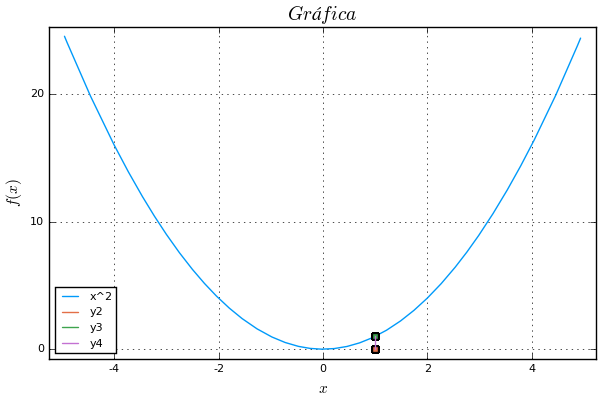

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [11]:
plot(x->x^2, xlabel=L"x", ylabel=L"f(x)", title=L"Gráfica", lab="x^2")
plot!([d1x[i] for i in 1:100], [d10[i] for i in 1:100], m=:square, )
plot!([d1x[i] for i in 1:100], [d1y[i] for i in 1:100], m=:square)
plot!(orb1x, orb1y)


[5] Aplica el método de Newton para encontrar raíces de distintas funciones. ¿Qué ocurre si empiezas con distintas condiciones iniciales? Prueba con distintas funciones.

In [117]:
g(x) = x^3

g (generic function with 1 method)

In [118]:
gp(x) = 3 * x^2

gp (generic function with 1 method)

In [119]:
x, y = Newt(g, gp, 1, 100)

(Number[1,0.666667,0.444444,0.296296,0.197531,0.131687,0.0877915,0.0585277,0.0390184,0.0260123  …  9.45574e-17,6.30383e-17,4.20255e-17,2.8017e-17,1.8678e-17,1.2452e-17,8.30133e-18,5.53422e-18,3.68948e-18,2.45965e-18],Number[0.666667,0.444444,0.296296,0.197531,0.131687,0.0877915,0.0585277,0.0390184,0.0260123,0.0173415  …  9.45574e-17,6.30383e-17,4.20255e-17,2.8017e-17,1.8678e-17,1.2452e-17,8.30133e-18,5.53422e-18,3.68948e-18,2.45965e-18])

In [120]:
dx, d0, dy = dinam(g, 1, 100)

(Number[1,1,1,1,1,1,1,1,1,1  …  1,1,1,1,1,1,1,1,1,1],Number[0,0,0,0,0,0,0,0,0,0  …  0,0,0,0,0,0,0,0,0,0],Number[1,1,1,1,1,1,1,1,1,1  …  1,1,1,1,1,1,1,1,1,1])

In [121]:
orbx, orby = orb(g, 1, 100)

([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],[0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0  …  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])


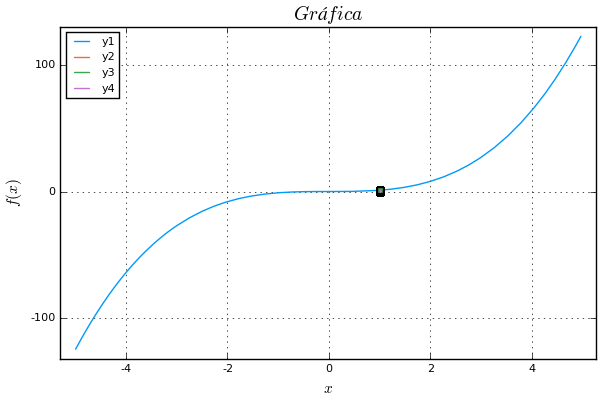

In [122]:
plot(x->x^3, xlabel=L"x", ylabel=L"f(x)", title=L"Gráfica")
plot!([dx[i] for i in 1:100], [d0[i] for i in 1:100], m=:square)
plot!([dx[i] for i in 1:100], [dy[i] for i in 1:100], m=:square)
plot!(orbx, orby)

In [131]:
x, y = Newt(g, gp, -0.8, 10)

(Number[-0.8,-0.533333,-0.355556,-0.237037,-0.158025,-0.10535,-0.0702332,-0.0468221,-0.0312148,-0.0208098,-0.0138732],Number[-0.533333,-0.355556,-0.237037,-0.158025,-0.10535,-0.0702332,-0.0468221,-0.0312148,-0.0208098,-0.0138732])

In [132]:
dx, d0, dy = dinam(g, -0.8, 10)

(Number[-0.8,-0.512,-0.134218,-0.00241785,-1.41348e-8,-2.82401e-24,-2.25217e-71,-1.14236e-212,-0.0,-0.0,-0.0],Number[0,0,0,0,0,0,0,0,0,0],Number[-0.512,-0.134218,-0.00241785,-1.41348e-8,-2.82401e-24,-2.25217e-71,-1.14236e-212,-0.0,-0.0,-0.0])

In [133]:
orbx, orby = orb(g, -0.8, 10)

([-0.8,-0.8,-0.512,-0.512,-0.134218,-0.134218,-0.00241785,-0.00241785,-1.41348e-8,-1.41348e-8  …  -2.82401e-24,-2.25217e-71,-2.25217e-71,-1.14236e-212,-1.14236e-212,-0.0,-0.0,-0.0,-0.0,-0.0],[0.0,-0.512,-0.512,-0.134218,-0.134218,-0.00241785,-0.00241785,-1.41348e-8,-1.41348e-8,-2.82401e-24  …  -2.25217e-71,-2.25217e-71,-1.14236e-212,-1.14236e-212,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0])


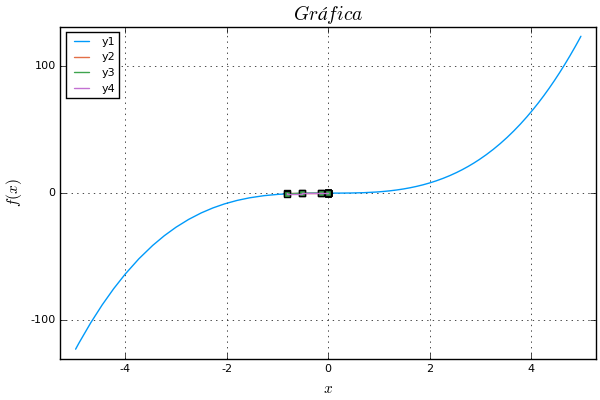

In [134]:
plot(x->x^3, xlabel=L"x", ylabel=L"f(x)", title=L"Gráfica")
plot!([dx[i] for i in 1:10], [d0[i] for i in 1:10], m=:square)
plot!([dx[i] for i in 1:10], [dy[i] for i in 1:10], m=:square)
plot!(orbx, orby)

In [15]:
j(x) = 2*x^3 + 10

j (generic function with 1 method)

In [16]:
jp(x) = 6*x^2

jp (generic function with 1 method)


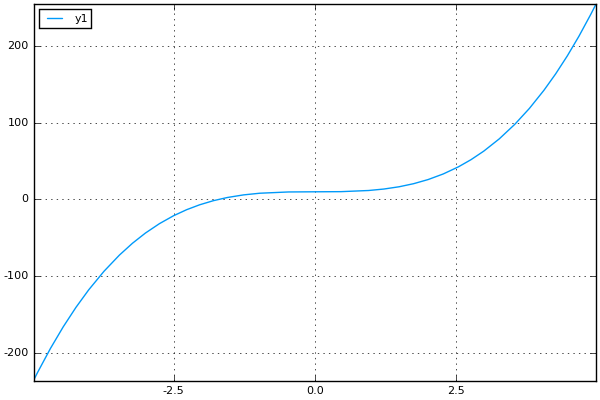

In [140]:
plot(x->2 * x^3 +10)

In [36]:
x, y = Newt(j, jp, 2, 10)

(Number[2,0.916667,-1.37236,-1.79984,-1.71439,-1.70999,-1.70998,-1.70998,-1.70998,-1.70998,-1.70998],Number[0.916667,-1.37236,-1.79984,-1.71439,-1.70999,-1.70998,-1.70998,-1.70998,-1.70998,-1.70998])

In [37]:
dx, d0, dy = dinam(j, 2, 10)

(Number[2,26,35162,86946219743066,9138465464133003098,5812100572278040410,2963350071221823322,8650700619225376602,5634054550641846106,3818549708162213722,780433300248209242],Number[0,0,0,0,0,0,0,0,0,0],Number[26,35162,86946219743066,9138465464133003098,5812100572278040410,2963350071221823322,8650700619225376602,5634054550641846106,3818549708162213722,780433300248209242])

In [38]:
orbx, orby = orb(j, 2, 10)

([2.0,2.0,26.0,26.0,35162.0,35162.0,8.69462e13,8.69462e13,9.13847e18,9.13847e18  …  5.8121e18,2.96335e18,2.96335e18,8.6507e18,8.6507e18,5.63405e18,5.63405e18,3.81855e18,3.81855e18,7.80433e17],[0.0,26.0,26.0,35162.0,35162.0,8.69462e13,8.69462e13,9.13847e18,9.13847e18,5.8121e18  …  2.96335e18,2.96335e18,8.6507e18,8.6507e18,5.63405e18,5.63405e18,3.81855e18,3.81855e18,7.80433e17,7.80433e17])


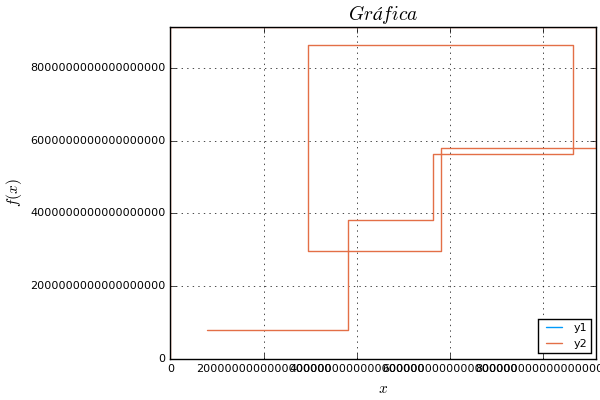

In [40]:
plot(x->2*x^3 +10, xlabel=L"x", ylabel=L"f(x)", title=L"Gráfica")
#plot!([dx[i] for i in 1:10], [d0[i] for i in 1:10], m=:square)
#plot!([dx[i] for i in 1:10], [dy[i] for i in 1:10], m=:square)
plot!(orbx, orby)

[6] ¿Qué tan rápido converge el método cuando esté cerca de una raíz. Utiliza `BigFloat`s. ¿Es mejor que bisección?

In [12]:
#Usando la primera función f(x) = x^2
plot(x->x^2, xlabel=L"x", ylabel=L"f(x)", title=L"Gráfica", lab="x^2", xscale=:log10, yscale=:log10)
#plot!([d1x[i] for i in 1:100], [d10[i] for i in 1:100], m=:square, )
#plot!([d1x[i] for i in 1:100], [d1y[i] for i in 1:100], m=:square)
#plot!(orb1x, orb1y)

DomainError: DomainError:

Sin embargo, es posible que el método de Newton *no converja*:

[7] El mismo código del método de Newton debería funcionar con números complejos. Utilízalo para encontrar raíces de la función $f(z) = z^3 -1$ **en el plano complejo**.

Dada una condición inicial, dibuja (por ejemplo) la parte imaginaria de la raíz a la cual converge (por ejemplo, después de un cierto número de pasos). Hazlo para una malla de condiciones iniciales en el plano. ¿Qué es lo que ves?

In [41]:
fun(z) = z^3 -1

fun (generic function with 1 method)

In [42]:
funp(z) = 3 * z^2 

funp (generic function with 1 method)

In [43]:
x, y = Newt(fun, funp, 1.0 + im, 100)

(Number[1.0+1.0im,0.666667+0.5im,0.578844-0.127467im,1.24696+0.313578im,1.00895+0.113678im,0.987868+0.00383684im,1.00013-9.53222e-5im,1.0-2.55681e-8im,1.0-4.55624e-16im,1.0+4.93038e-31im  …  1.0+0.0im,1.0+0.0im,1.0+0.0im,1.0+0.0im,1.0+0.0im,1.0+0.0im,1.0+0.0im,1.0+0.0im,1.0+0.0im,1.0+0.0im],Number[0.666667+0.5im,0.578844-0.127467im,1.24696+0.313578im,1.00895+0.113678im,0.987868+0.00383684im,1.00013-9.53222e-5im,1.0-2.55681e-8im,1.0-4.55624e-16im,1.0+4.93038e-31im,1.0+0.0im  …  1.0+0.0im,1.0+0.0im,1.0+0.0im,1.0+0.0im,1.0+0.0im,1.0+0.0im,1.0+0.0im,1.0+0.0im,1.0+0.0im,1.0+0.0im])

In [44]:
# Creamos un arreglo de números complejos 
function malla_compleja(n::Int64)
    v = zeros(Complex128, n, n)
    real = collect(linspace(-1, 1, n))
    imag = collect(linspace(-1, 1, n))
    for i in 1:n
        for j in 1:n
            v[j,1] = real[i] - imag[j]*im
        end
    end
    return v
end

malla_compleja (generic function with 1 method)

In [47]:
A = malla_compleja(4)

4×4 Array{Complex{Float64},2}:
 1.0+1.0im       0.0+0.0im  0.0+0.0im  0.0+0.0im
 1.0+0.333333im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 1.0-0.333333im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 1.0-1.0im       0.0+0.0im  0.0+0.0im  0.0+0.0im

In [48]:
for i in collect(A)
    plot(i->i^3 -1, xlabel=L"x", ylabel=L"f(x)", title=L"Gráfica", lab="z^3 -1")
end


[8] Haz lo mismo para otras funciones en el plano complejo.

[9] Considera ahora cómo encontrar raíces de un sistema de ecuaciones, escritos en forma vectorial,

$$\mathbf{f}(\mathbf{x}) = \mathbf{0}.$$

Repite un desarrollo siguiendo la pauta de la pregunta [1] en este contexto.
¿Qué es lo que cambia? ¿Qué tipo de operación numérica necesitaríamos para llevar a cabo el método de Newton en este nuevo contexto?